**Assignment 1 - Data Wrangling II**

Create an "Academic performance" dataset of students and perform the following operations using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

Reason and document your approach properly.

---

**Code**

0. Creating an "Academic performance" dataset

In [103]:
import pandas, numpy, seaborn

# create dataset
count = 8000
d = pandas.DataFrame({
	"roll_no": range(1001, 1001 + count),
	"in_sem_marks": numpy.random.uniform(low=0.0, high=30.0, size=(count,)),
	"end_sem_marks": numpy.random.uniform(low=0.0, high=70.0, size=(count,)),
	"passed": [False] * (count)
})
d.passed.where(~((d.in_sem_marks >= 12.0) & (d.end_sem_marks >= 24.0)), other=True, inplace=True)

# create NaNs
d.mask(numpy.random.random(d.shape) < .01, inplace=True)

# create outliers
d.in_sem_marks.mask(numpy.random.random(d.in_sem_marks.shape) < .01, other=numpy.random.uniform(low=30.0, high=70.0), inplace=True)
d.in_sem_marks.mask(numpy.random.random(d.in_sem_marks.shape) < .01, other=numpy.random.uniform(low=-30.0, high=0.0), inplace=True)
d.end_sem_marks.mask(numpy.random.random(d.end_sem_marks.shape) < .01, other=numpy.random.uniform(low=70.0, high=100.0), inplace=True)
d.end_sem_marks.mask(numpy.random.random(d.end_sem_marks.shape) < .01, other=numpy.random.uniform(low=-70.0, high=0.0), inplace=True)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,21.110061,11.113670,False
1,1002.0,25.876625,47.466230,True
2,1003.0,28.359258,3.632885,False
3,1004.0,5.567470,29.734482,False
4,1005.0,5.029957,65.386431,False
...,...,...,...,...
7995,8996.0,17.905170,NaN,True
7996,8997.0,1.178186,20.746202,False
7997,8998.0,2.939085,47.182426,False
7998,8999.0,19.806125,7.790043,False


1. Fixing missing values

In [104]:
# Count of null values
d.isnull().sum()

roll_no          64
in_sem_marks     72
end_sem_marks    72
passed           84
dtype: int64

In [105]:
# Drop rows without roll no
d.drop(d[d.roll_no.isnull()].index, inplace=True)
d.reset_index(drop=True, inplace=True)

# Default values for null marks
d.in_sem_marks.fillna(12.0, inplace=True)
d.end_sem_marks.fillna(24.0, inplace=True)

# Calculated values for passed boolean
d.passed.fillna(False, inplace=True)
d.passed.where(~((d.in_sem_marks >= 12.0) & (d.end_sem_marks >= 24.0)), other=True, inplace=True)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,21.110061,11.113670,False
1,1002.0,25.876625,47.466230,True
2,1003.0,28.359258,3.632885,False
3,1004.0,5.567470,29.734482,False
4,1005.0,5.029957,65.386431,False
...,...,...,...,...
7931,8996.0,17.905170,24.000000,True
7932,8997.0,1.178186,20.746202,False
7933,8998.0,2.939085,47.182426,False
7934,8999.0,19.806125,7.790043,False


2. Fix outliers

<Axes: >

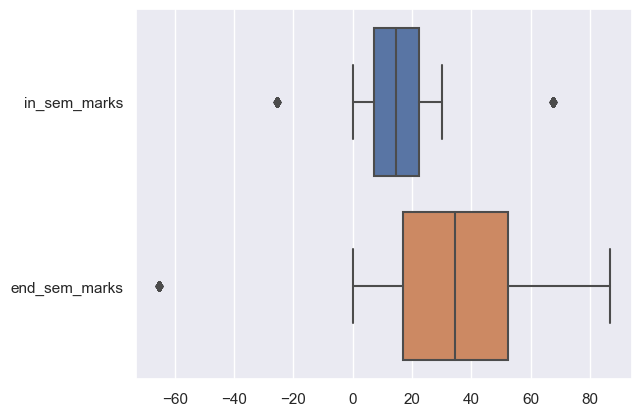

In [106]:
seaborn.set_theme()
seaborn.boxplot(d.drop(["roll_no", "passed"], axis=1), orient="h")

In [107]:
# Negative marks
d.in_sem_marks.where(~(d.in_sem_marks < 0), other=(-1.0 * d.in_sem_marks), inplace=True)
d.end_sem_marks.where(~(d.end_sem_marks < 0), other=(-1.0 * d.end_sem_marks), inplace=True)

# Greater than maximum marks
d.in_sem_marks.where(~(d.in_sem_marks > 30.0), other=(30 * d.in_sem_marks / 70.0), inplace=True)
d.end_sem_marks.where(~(d.end_sem_marks > 70.0), other=(70 * d.end_sem_marks / 100.0), inplace=True)

# Recalculated values for passed boolean
d.passed.fillna(False, inplace=True)
d.passed.where(~((d.in_sem_marks >= 12.0) & (d.end_sem_marks >= 24.0)), other=True, inplace=True)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,21.110061,11.113670,False
1,1002.0,25.876625,47.466230,True
2,1003.0,28.359258,3.632885,False
3,1004.0,5.567470,29.734482,False
4,1005.0,5.029957,65.386431,False
...,...,...,...,...
7931,8996.0,17.905170,24.000000,True
7932,8997.0,1.178186,20.746202,False
7933,8998.0,2.939085,47.182426,False
7934,8999.0,19.806125,7.790043,False


3. Data transformations

In [108]:
# converting marks to percentages
d.in_sem_marks = d.in_sem_marks.apply(lambda x : 100.0 * x / 30.0)
d.end_sem_marks = d.end_sem_marks.apply(lambda x : 100.0 * x / 70.0)

d

,roll_no,in_sem_marks,end_sem_marks,passed
0,1001.0,70.366870,15.876672,False
1,1002.0,86.255418,67.808901,True
2,1003.0,94.530861,5.189835,False
3,1004.0,18.558233,42.477832,False
4,1005.0,16.766524,93.409187,False
...,...,...,...,...
7931,8996.0,59.683901,34.285714,True
7932,8997.0,3.927286,29.637432,False
7933,8998.0,9.796949,67.403466,False
7934,8999.0,66.020417,11.128633,False


In [109]:
d.describe()

,roll_no,in_sem_marks,end_sem_marks
count,7936.000000,7936.000000,7936.000000
mean,4997.697581,50.292794,50.601621
std,2309.175612,29.190713,29.071013
min,1001.000000,0.014483,0.000796
25%,2996.750000,24.898170,25.299956
50%,4996.500000,49.892972,50.432136
75%,6995.250000,75.805357,75.901086
max,9000.000000,99.994952,99.989403
